In [1]:
import numpy as np

In [2]:
from scipy.special import airy

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [22]:
from ipywidgets import interact

## Check how good the asymptotic forms of the Airy functions work

### Ai(z)

In [4]:
def Ai_asymp_neg(z):
    return 1.0/(np.sqrt(np.pi) * (-z)**0.25) * np.sin(2.0/3.0 * (-z)**1.5 + np.pi/4.)
def Ai_asymp_pos(z):
    return 1.0/(2 * np.sqrt(np.pi) * (z)**0.25) * np.exp(-2.0/3.0 * z**1.5)

(-0.6, 1)

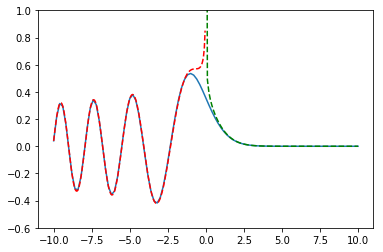

In [5]:
xs = np.linspace(-10, 10, 101)
xs_neg = np.linspace(-10, 0, 201, endpoint=False)
xs_pos = np.linspace(0.00001, 10, 101)

plt.plot(xs, airy(xs)[0])
plt.plot(xs_neg, Ai_asymp_neg(xs_neg), "r--")
plt.plot(xs_pos, Ai_asymp_pos(xs_pos), "g--")
plt.ylim(-0.6, 1)

### Bi(z)

In [6]:
def Bi_asymp_neg(z):
    return 1.0/(np.sqrt(np.pi) * (-z)**0.25) * np.cos(2.0/3.0 * (-z)**1.5 + np.pi/4.)
def Bi_asymp_pos(z):
    return 1.0/(np.sqrt(np.pi) * (z)**0.25) * np.exp(2.0/3.0 * z**1.5)

(-0.6, 2)

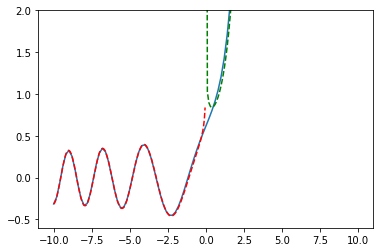

In [7]:
xs = np.linspace(-10, 10, 101)
xs_neg = np.linspace(-10, 0, 201, endpoint=False)
xs_pos = np.linspace(0.00001, 10, 101)

plt.plot(xs, airy(xs)[2])
plt.plot(xs_neg, Bi_asymp_neg(xs_neg), "r--")
plt.plot(xs_pos, Bi_asymp_pos(xs_pos), "g--")
plt.ylim(-0.6, 2)

### Now the WKB wave function together with the Airy function

In [65]:
from scipy.integrate import quad
from scipy.misc import derivative
from scipy.optimize import brentq

def plot_patching_region(V, E, start, stop, m=1):

    x_t = brentq(lambda x: V(x) - E, start, stop)
    xs = np.linspace(start, stop, 1001)

    def calc_psi_wkb(x):
        def p(x):
            if x < x_t:
                return np.sqrt(2 * m * (E - V(x)))
            else:
                return np.sqrt(2 * m * (V(x) - E))
            
        if x < x_t:
            return 2/np.sqrt(p(x)) * np.sin(quad(p , x, x_t)[0] + np.pi/4)
        else:
            return 1/np.sqrt(p(x)) * np.exp(-quad(p, x_t, x)[0])
    
    psi_wkb = np.vectorize(calc_psi_wkb)(xs)

    alpha = (2 * m * derivative(V, 0, dx=(stop-start)/1e7))**(1.0/3.0)
    airy_fun = np.sqrt(4 * np.pi /alpha) * airy(alpha*(xs-x_t))[0]

    plt.figure(figsize=(10,8))
    ax1 = plt.subplot(211)
    ax1.plot(xs, psi_wkb, "k", label="WKB")
    ax1.plot(xs, airy_fun, "b--", label="Airy")
    ax1.legend()
    
    ax2 = plt.subplot(212)
    ax2.plot(xs, V(xs), "k")
    ax2.plot((xs[0], xs[-1]), (E, E), "b--")
    
    

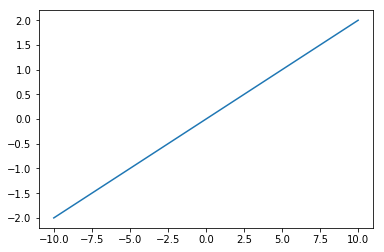

In [73]:
start = -10
stop = 10

def V(x):
    return 0.2 * x
    #return 0.01 * (x+10)**2 -2  
    #return np.tanh(x/5.)

xs = np.linspace(start, stop, 101)
plt.plot(xs, V(xs))

In [74]:
interact(lambda E: plot_patching_region(V, E=E, start=-10, stop=10), E=(-1.99, 1.99))

A Jupyter Widget

<function __main__.<lambda>>